---
<h1> Mnist Implementation from scratch<h1>

---

## Desing

 - Two layer neuronal network of 10 nodes to identify digits from a 24x24 image
 - Activation function wiil be ReLU in the hidden layer
 - Activation function wiil be SoftMax for the output layer

Matriz:
- A = X [784xm]
- Z = W [10x784] x A [784xm] + b [10xm]

## Libraries

In [202]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Data

In [203]:
#Mnist data base: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?resource=download
data = pd.read_csv('mnist_train.csv')

In [204]:
data=np.array(data)
m, n = data.shape
np.random.shuffle(data)

#test
data_dev = data[0:1000].T
Y_dev = data_dev[0] #labels
X_dev = data_dev[1:n] #features
X_dev = X_dev / 255

#train
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

## Implementation

In [205]:
#activation functions
def ReLU(Z):
  return np.maximum(0,Z)

def deriv_ReLU(Z):
    return Z > 0 #true is 1 and false is 0

def softmax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A


In [206]:
#one hot encoding
def one_hot(Y):
    Y=Y.astype(int)
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [207]:
#Params manage
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  m, n = dW2.shape
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1,b1,W2,b2


In [208]:
#fordward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [209]:
#backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):

    one_hot_Y = one_hot(Y)

    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)

    return dW1, db1, dW2, db2

In [210]:
def get_accuracy(predictions, Y):
  print(predictions,Y)
  return np.sum(predictions == Y) / Y.size

In [211]:
# gradiant descent
def gradient_descent(X,Y,iterations,alpha):
  W1,b1,W2,b2 = init_params()

  for i in range (iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

    if (i % 10 == 0):
      print( "Iteration: ", i)
      print( "Accuracy: ", get_accuracy(np.argmax(A2,0),Y))

  return W1, b1, W2, b2

## Training

In [212]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[8 7 7 ... 7 7 7] [5 0 6 ... 4 1 1]
Accuracy:  0.0848135593220339
Iteration:  10
[2 2 8 ... 3 2 2] [5 0 6 ... 4 1 1]
Accuracy:  0.2358135593220339
Iteration:  20
[2 2 8 ... 3 2 2] [5 0 6 ... 4 1 1]
Accuracy:  0.3554576271186441
Iteration:  30
[8 0 8 ... 4 1 1] [5 0 6 ... 4 1 1]
Accuracy:  0.5665423728813559
Iteration:  40
[8 0 8 ... 4 1 1] [5 0 6 ... 4 1 1]
Accuracy:  0.6487627118644068
Iteration:  50
[6 0 8 ... 4 1 1] [5 0 6 ... 4 1 1]
Accuracy:  0.6973898305084746
Iteration:  60
[6 0 8 ... 4 1 1] [5 0 6 ... 4 1 1]
Accuracy:  0.7247796610169491
Iteration:  70
[6 0 6 ... 4 1 1] [5 0 6 ... 4 1 1]
Accuracy:  0.7448135593220339
Iteration:  80
[6 0 6 ... 4 1 1] [5 0 6 ... 4 1 1]
Accuracy:  0.7606779661016949
Iteration:  90
[6 0 6 ... 4 1 1] [5 0 6 ... 4 1 1]
Accuracy:  0.773593220338983
Iteration:  100
[6 0 6 ... 4 1 1] [5 0 6 ... 4 1 1]
Accuracy:  0.7854576271186441
Iteration:  110
[6 0 6 ... 4 1 1] [5 0 6 ... 4 1 1]
Accuracy:  0.7952033898305084
Iteration:  120
[6 0 6 ... 4

## Testing

In [215]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


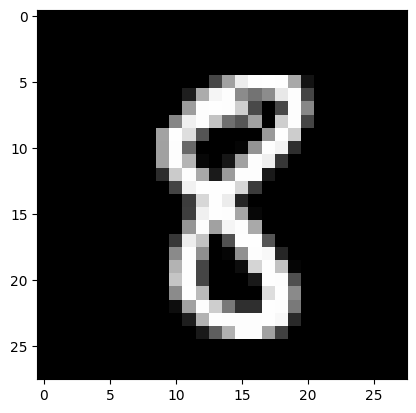

In [226]:
test_prediction(6, W1, b1, W2, b2)

In [218]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 0 2 2 7 8 0 4 4 0 9 8 5 5 4 8 9 5 1 9 7 2 6 6 4 4 8 9 3 1 0 6 9 9 3 7 1
 5 1 4 2 1 9 9 5 5 6 3 0 6 7 2 4 5 9 8 8 1 5 2 6 9 1 8 7 1 9 0 9 0 1 2 9 2
 9 8 1 0 8 2 1 0 9 3 0 1 3 4 5 1 1 3 0 8 1 7 7 5 8 5 2 6 2 9 5 5 3 0 5 7 1
 8 8 0 7 1 8 1 3 5 2 0 3 6 4 3 7 0 0 4 3 6 0 7 6 6 4 5 4 3 9 1 0 0 9 3 3 6
 3 3 0 5 2 6 5 8 4 5 8 7 5 9 5 7 4 6 8 0 4 1 7 0 9 0 6 9 6 4 4 7 9 0 4 1 0
 4 0 8 2 3 5 3 7 9 2 6 2 2 1 4 8 5 5 2 0 0 1 4 9 4 3 8 1 2 4 9 3 7 0 2 2 3
 3 5 1 4 2 0 2 9 7 2 9 0 1 8 1 0 6 2 4 5 2 2 5 9 0 7 0 5 9 3 1 8 0 1 1 8 9
 7 0 7 8 9 7 1 7 4 3 4 1 5 8 1 4 5 2 9 2 7 6 0 7 4 3 8 7 0 2 9 9 7 0 1 3 9
 5 7 4 9 8 6 9 1 6 6 8 8 4 0 0 8 5 5 4 3 9 8 0 9 0 5 9 2 9 5 8 4 5 7 2 2 5
 8 0 9 2 7 2 2 8 7 6 3 8 0 4 8 0 5 5 6 6 3 1 2 7 5 2 6 7 9 4 6 1 1 8 7 3 8
 5 3 2 3 2 1 2 6 7 4 3 3 4 5 6 4 7 3 2 9 1 0 1 2 9 5 9 9 3 1 1 2 9 3 6 7 5
 5 2 2 8 4 6 5 3 0 6 1 5 2 4 1 4 4 8 7 5 3 9 1 6 2 0 7 8 9 2 4 9 1 1 9 1 1
 4 4 4 1 8 6 0 0 3 9 8 4 9 1 4 9 4 6 3 0 9 2 8 7 6 0 5 6 0 4 3 0 7 9 1 3 9
 6 3 1 2 1 1 6 2 8 1 3 5 

0.909